In [ ]:
pip install opencv-python matplotlib scikit-image pywavelets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 19.2 MB/s eta 0:00:00


In [ ]:
!pip install PyWavelets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 34.0 MB/s eta 0:00:00


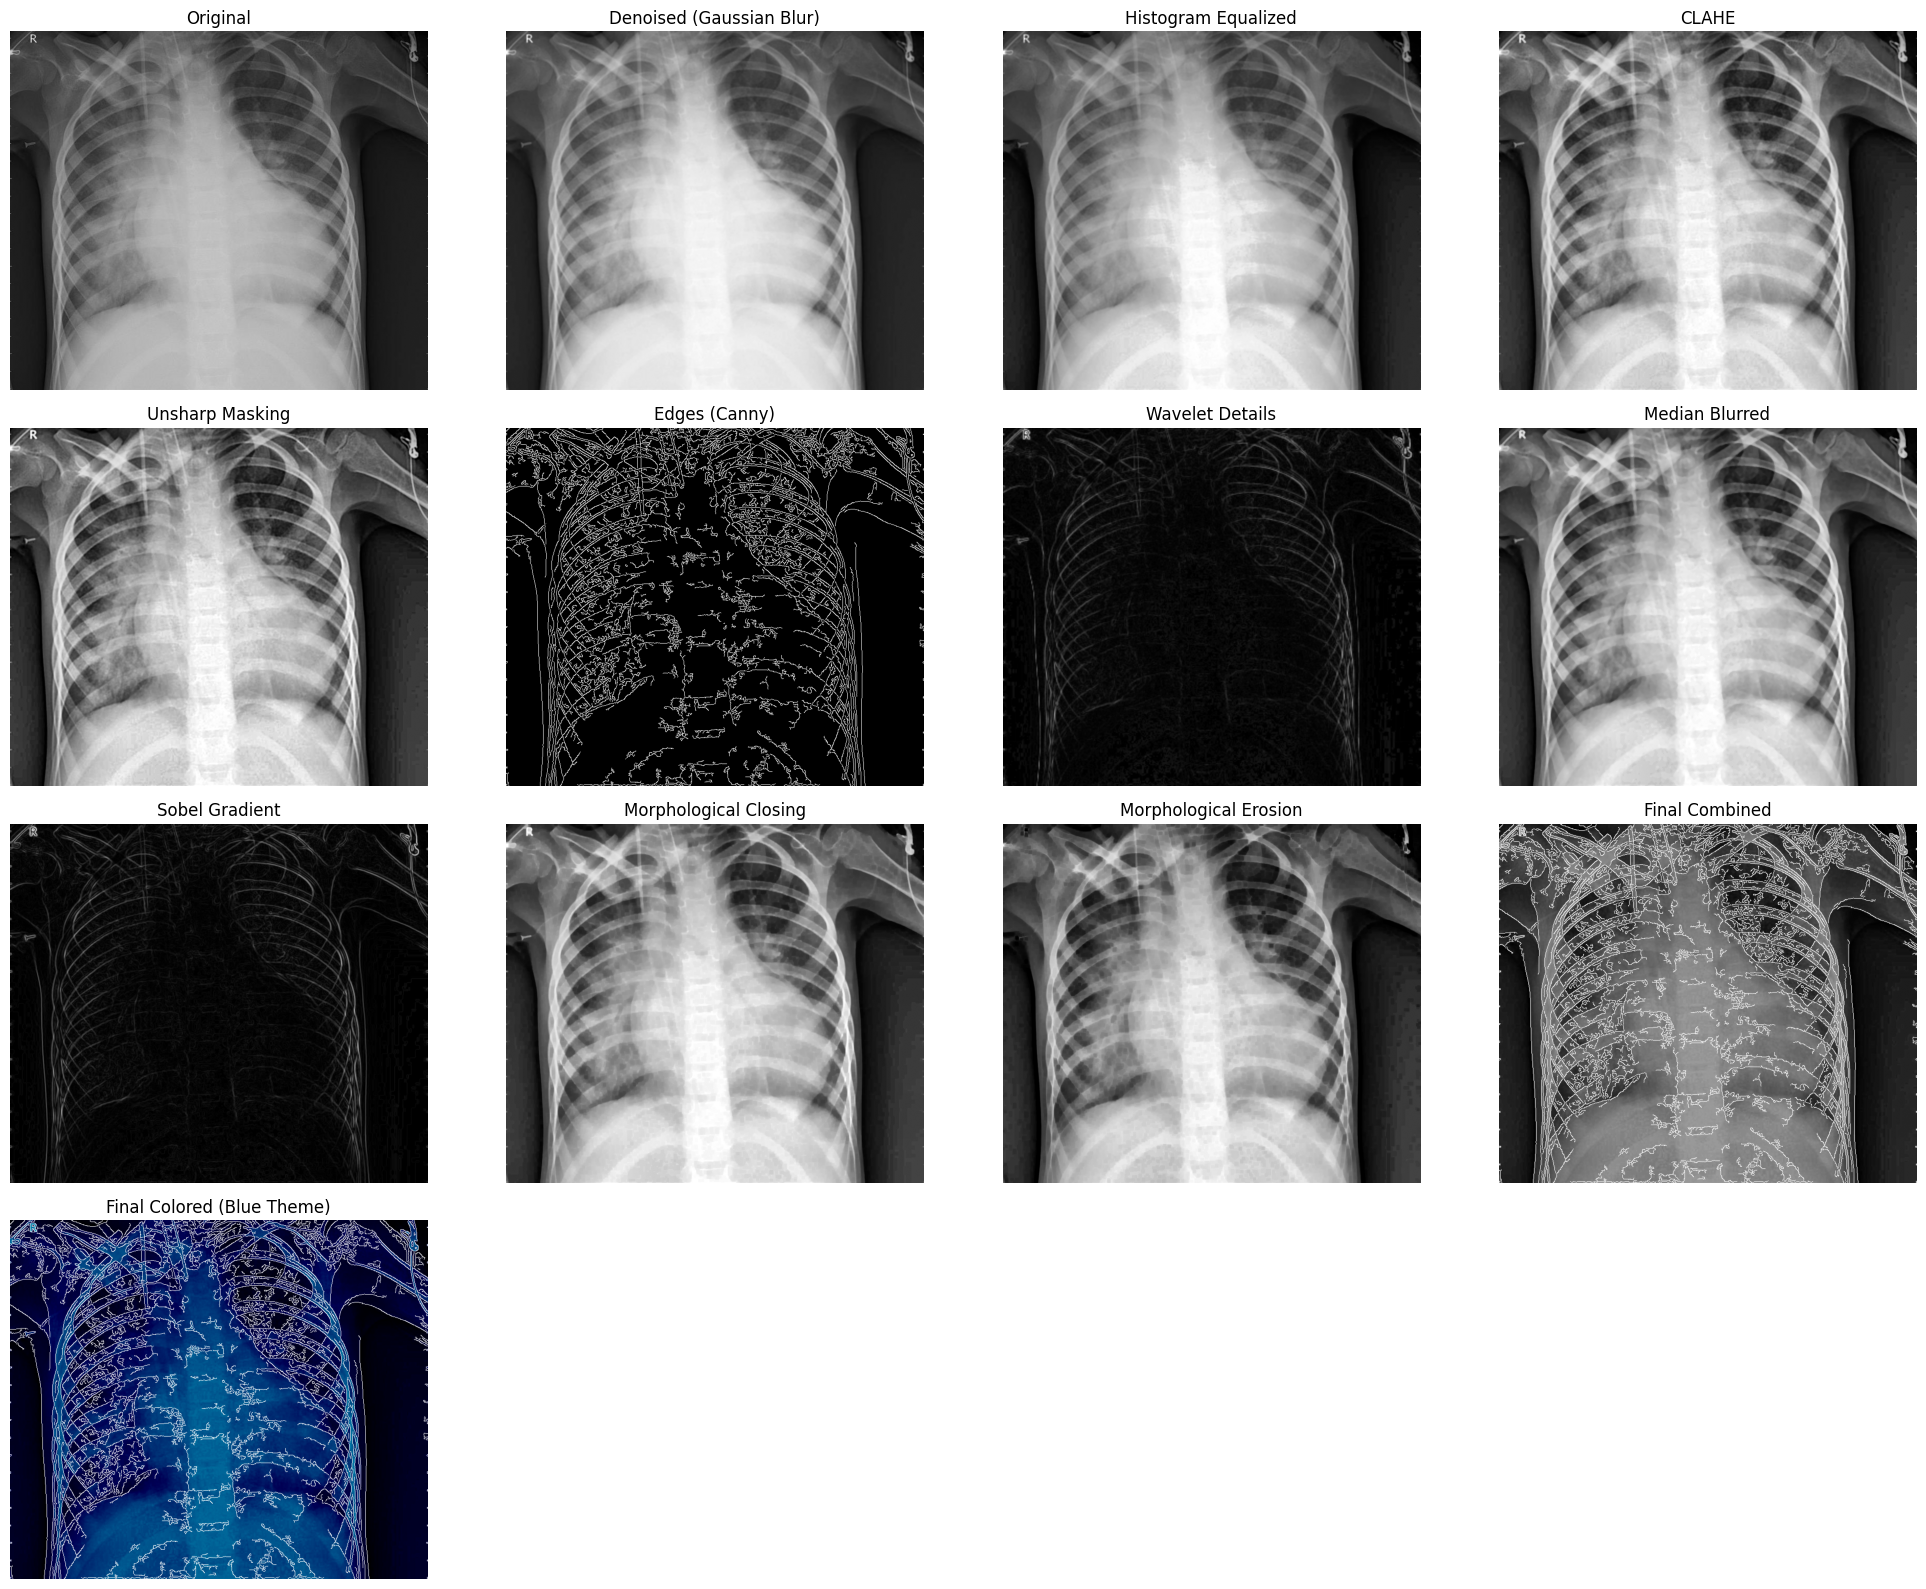

In [ ]:
import cv2
import numpy as np
import pywt
import matplotlib.pyplot as plt
from skimage import exposure

def preprocess_xray(image_path):
    # Step 1: Load and convert to grayscale
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    if image is None:
        raise FileNotFoundError(f"Image not found at path: {image_path}")

    # Step 2: Denoising using Gaussian filter
    denoised = cv2.GaussianBlur(image, (5, 5), 0)

    # Step 3: Histogram Equalization
    equalized = cv2.equalizeHist(denoised)

    # Step 4: CLAHE for local contrast
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    clahe_img = clahe.apply(equalized)

    # Step 5: Unsharp Masking (Sharpening)
    blurred = cv2.GaussianBlur(clahe_img, (9, 9), 10.0)
    unsharp = cv2.addWeighted(clahe_img, 1.5, blurred, -0.5, 0)

    # Step 6: Edge Detection (Canny)
    edges = cv2.Canny(unsharp, threshold1=30, threshold2=100)

    # Step 7: Wavelet Transform
    coeffs = pywt.dwt2(unsharp, 'haar')
    cA, (cH, cV, cD) = coeffs
    wavelet_combined = cv2.normalize(np.sqrt(cH**2 + cV**2 + cD**2), None, 0, 255, cv2.NORM_MINMAX)
    wavelet_combined = wavelet_combined.astype(np.uint8)
    wavelet_resized = cv2.resize(wavelet_combined, (unsharp.shape[1], unsharp.shape[0]))

    # Step 8: Median Blurring
    median_blur = cv2.medianBlur(unsharp, 5)

    # Step 9: Sobel Operator
    sobelx = cv2.Sobel(unsharp, cv2.CV_64F, 1, 0, ksize=3)
    sobely = cv2.Sobel(unsharp, cv2.CV_64F, 0, 1, ksize=3)
    sobel_mag = cv2.magnitude(sobelx, sobely)
    sobel_mag = cv2.normalize(sobel_mag, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

    # Step 10: Morphological Closing
    kernel = np.ones((5, 5), np.uint8)
    morph_close = cv2.morphologyEx(unsharp, cv2.MORPH_CLOSE, kernel)

    # Step 11: Morphological Erosion
    morph_eroded = cv2.erode(unsharp, kernel, iterations=1)

    # Step 12: Final Fusion
    combined = cv2.addWeighted(unsharp, 0.6, wavelet_resized, 0.3, 0)
    combined[edges > 0] = 255

    # Step 13: Apply blue-based colormap
    colored = cv2.applyColorMap(combined, cv2.COLORMAP_OCEAN)

    return {
        "Original": image,
        "Denoised (Gaussian Blur)": denoised,
        "Histogram Equalized": equalized,
        "CLAHE": clahe_img,
        "Unsharp Masking": unsharp,
        "Edges (Canny)": edges,
        "Wavelet Details": wavelet_resized,
        "Median Blurred": median_blur,
        "Sobel Gradient": sobel_mag,
        "Morphological Closing": morph_close,
        "Morphological Erosion": morph_eroded,
        "Final Combined": combined,
        "Final Colored (Blue Theme)": colored
    }

# Path to your X-ray image
image_path = "pneumonia1.jpg"  # Replace with your image file

# Run preprocessing
results = preprocess_xray(image_path)

# Display results
plt.figure(figsize=(20, 16))
for i, (title, img) in enumerate(results.items()):
    plt.subplot(4, 4, i + 1)
    if len(img.shape) == 2:
        plt.imshow(img, cmap='gray')
    else:
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')

plt.tight_layout()
plt.show()

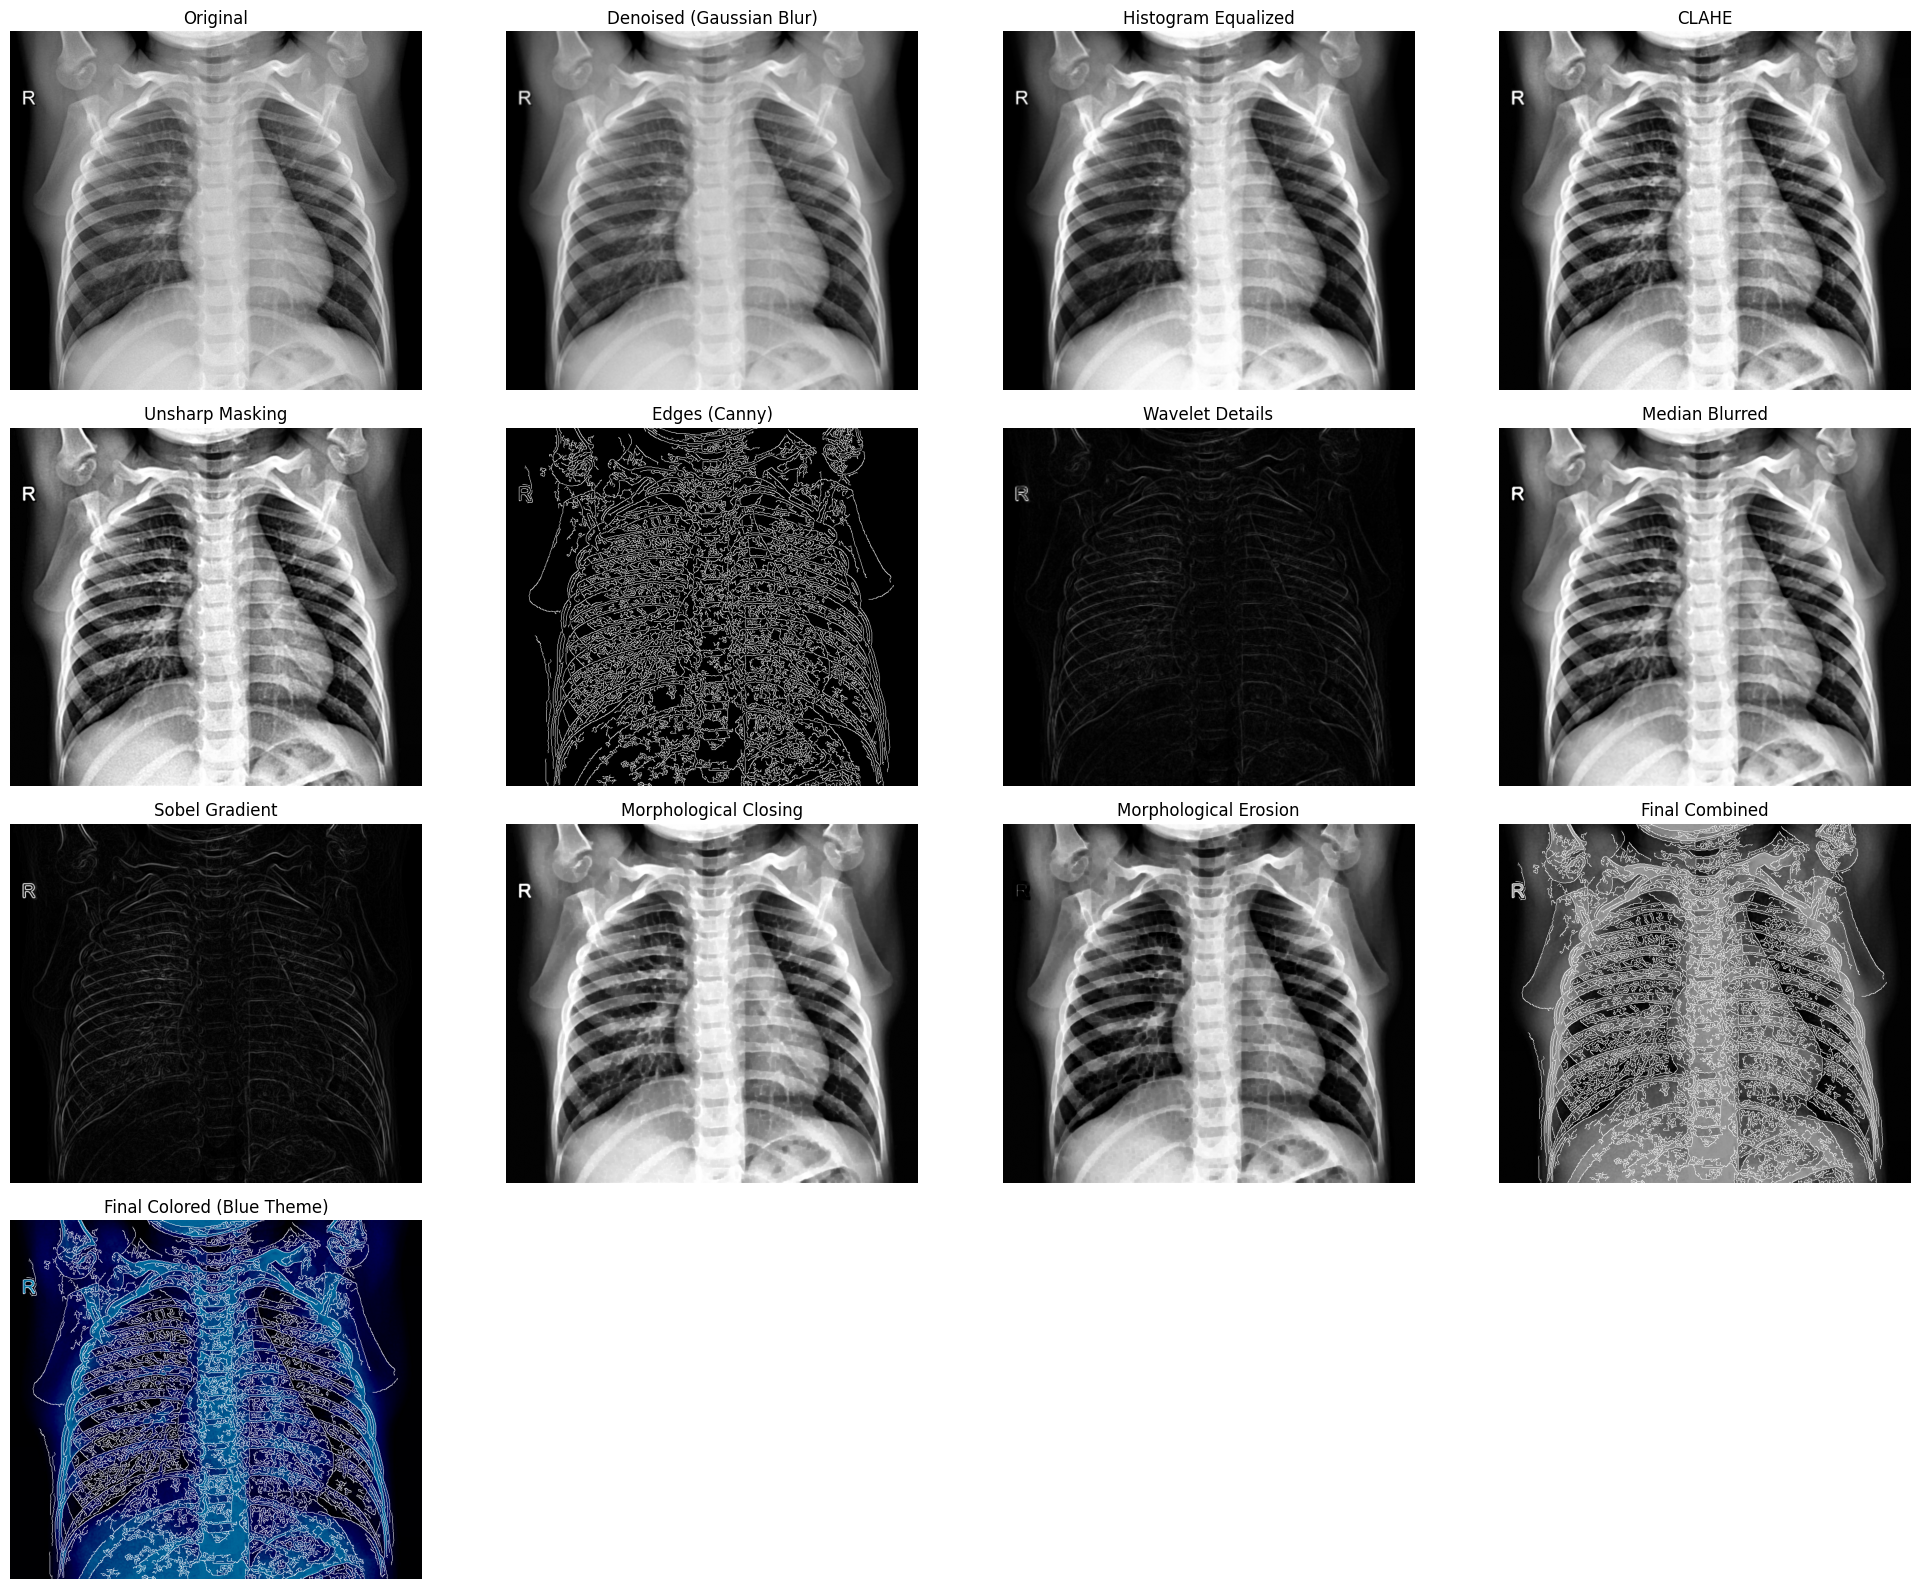

In [ ]:
import cv2
import numpy as np
import pywt
import matplotlib.pyplot as plt
from skimage import exposure

def preprocess_xray(image_path):
    # Step 1: Load and convert to grayscale
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    if image is None:
        raise FileNotFoundError(f"Image not found at path: {image_path}")

    # Step 2: Denoising using Gaussian filter
    denoised = cv2.GaussianBlur(image, (5, 5), 0)

    # Step 3: Histogram Equalization
    equalized = cv2.equalizeHist(denoised)

    # Step 4: CLAHE for local contrast
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    clahe_img = clahe.apply(equalized)

    # Step 5: Unsharp Masking (Sharpening)
    blurred = cv2.GaussianBlur(clahe_img, (9, 9), 10.0)
    unsharp = cv2.addWeighted(clahe_img, 1.5, blurred, -0.5, 0)

    # Step 6: Edge Detection (Canny)
    edges = cv2.Canny(unsharp, threshold1=30, threshold2=100)

    # Step 7: Wavelet Transform
    coeffs = pywt.dwt2(unsharp, 'haar')
    cA, (cH, cV, cD) = coeffs
    wavelet_combined = cv2.normalize(np.sqrt(cH**2 + cV**2 + cD**2), None, 0, 255, cv2.NORM_MINMAX)
    wavelet_combined = wavelet_combined.astype(np.uint8)
    wavelet_resized = cv2.resize(wavelet_combined, (unsharp.shape[1], unsharp.shape[0]))

    # Step 8: Median Blurring
    median_blur = cv2.medianBlur(unsharp, 5)

    # Step 9: Sobel Operator
    sobelx = cv2.Sobel(unsharp, cv2.CV_64F, 1, 0, ksize=3)
    sobely = cv2.Sobel(unsharp, cv2.CV_64F, 0, 1, ksize=3)
    sobel_mag = cv2.magnitude(sobelx, sobely)
    sobel_mag = cv2.normalize(sobel_mag, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

    # Step 10: Morphological Closing
    kernel = np.ones((5, 5), np.uint8)
    morph_close = cv2.morphologyEx(unsharp, cv2.MORPH_CLOSE, kernel)

    # Step 11: Morphological Erosion
    morph_eroded = cv2.erode(unsharp, kernel, iterations=1)

    # Step 12: Final Fusion
    combined = cv2.addWeighted(unsharp, 0.6, wavelet_resized, 0.3, 0)
    combined[edges > 0] = 255

    # Step 13: Apply blue-based colormap
    colored = cv2.applyColorMap(combined, cv2.COLORMAP_OCEAN)

    return {
        "Original": image,
        "Denoised (Gaussian Blur)": denoised,
        "Histogram Equalized": equalized,
        "CLAHE": clahe_img,
        "Unsharp Masking": unsharp,
        "Edges (Canny)": edges,
        "Wavelet Details": wavelet_resized,
        "Median Blurred": median_blur,
        "Sobel Gradient": sobel_mag,
        "Morphological Closing": morph_close,
        "Morphological Erosion": morph_eroded,
        "Final Combined": combined,
        "Final Colored (Blue Theme)": colored
    }

# Path to your X-ray image
image_path = "normal.jpg"  # Replace with your image file

# Run preprocessing
results = preprocess_xray(image_path)

# Display results
plt.figure(figsize=(20, 16))
for i, (title, img) in enumerate(results.items()):
    plt.subplot(4, 4, i + 1)
    if len(img.shape) == 2:
        plt.imshow(img, cmap='gray')
    else:
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')

plt.tight_layout()
plt.show()

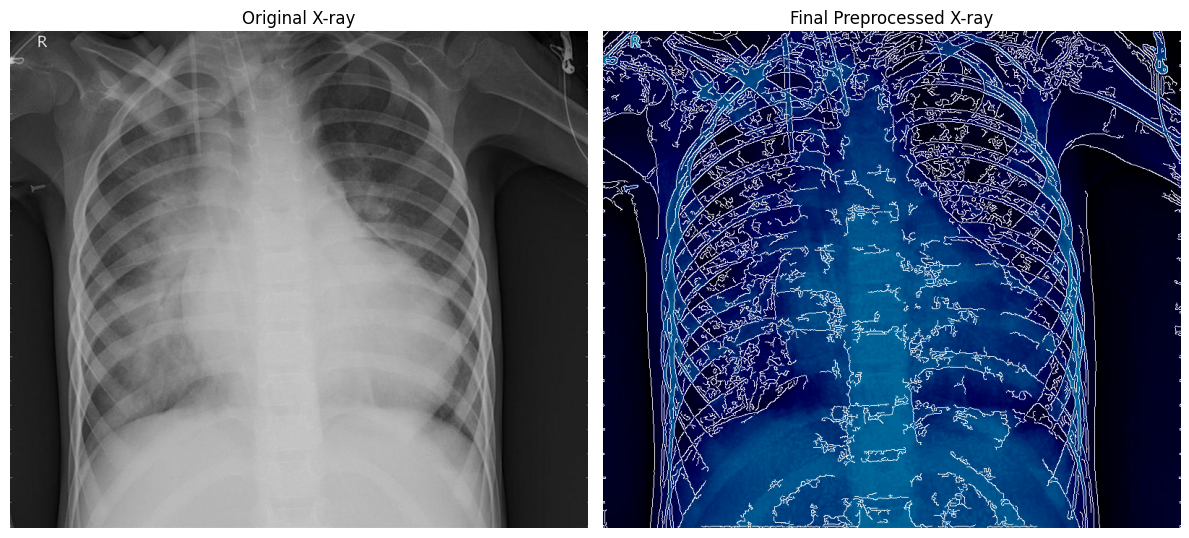

In [ ]:
import cv2
import numpy as np
import pywt
import matplotlib.pyplot as plt

def preprocess_xray(image_path):
    # Step 1: Load and convert to grayscale
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    if image is None:
        raise FileNotFoundError(f"Image not found at path: {image_path}")

    # Step 2: Denoising using Gaussian filter
    denoised = cv2.GaussianBlur(image, (5, 5), 0)

    # Step 3: Histogram Equalization
    equalized = cv2.equalizeHist(denoised)

    # Step 4: CLAHE for local contrast
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    clahe_img = clahe.apply(equalized)

    # Step 5: Unsharp Masking (Sharpening)
    blurred = cv2.GaussianBlur(clahe_img, (9, 9), 10.0)
    unsharp = cv2.addWeighted(clahe_img, 1.5, blurred, -0.5, 0)

    # Step 6: Edge Detection (Canny)
    edges = cv2.Canny(unsharp, threshold1=30, threshold2=100)

    # Step 7: Wavelet Transform
    coeffs = pywt.dwt2(unsharp, 'haar')
    cA, (cH, cV, cD) = coeffs
    wavelet_combined = cv2.normalize(np.sqrt(cH**2 + cV**2 + cD**2), None, 0, 255, cv2.NORM_MINMAX)
    wavelet_combined = wavelet_combined.astype(np.uint8)
    wavelet_resized = cv2.resize(wavelet_combined, (unsharp.shape[1], unsharp.shape[0]))

    # Step 8: Median Blurring
    median_blur = cv2.medianBlur(unsharp, 5)

    # Step 9: Sobel Operator
    sobelx = cv2.Sobel(unsharp, cv2.CV_64F, 1, 0, ksize=3)
    sobely = cv2.Sobel(unsharp, cv2.CV_64F, 0, 1, ksize=3)
    sobel_mag = cv2.magnitude(sobelx, sobely)
    sobel_mag = cv2.normalize(sobel_mag, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

    # Step 10: Morphological Closing
    kernel = np.ones((5, 5), np.uint8)
    morph_close = cv2.morphologyEx(unsharp, cv2.MORPH_CLOSE, kernel)

    # Step 11: Morphological Erosion
    morph_eroded = cv2.erode(unsharp, kernel, iterations=1)

    # Step 12: Final Fusion
    combined = cv2.addWeighted(unsharp, 0.6, wavelet_resized, 0.3, 0)
    combined[edges > 0] = 255

    # Step 13: Apply blue-based colormap
    colored = cv2.applyColorMap(combined, cv2.COLORMAP_OCEAN)

    return image, colored

# Path to your X-ray image
image_path = "pneumonia1.jpg"  # Replace with your image file

# Run preprocessing
original, final_output = preprocess_xray(image_path)

# Display results (Original and Final output side by side)
plt.figure(figsize=(12, 6))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(original, cmap='gray')
plt.title("Original X-ray")
plt.axis('off')

# Final output image
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(final_output, cv2.COLOR_BGR2RGB))
plt.title("Final Preprocessed X-ray")
plt.axis('off')

plt.tight_layout()
plt.show()

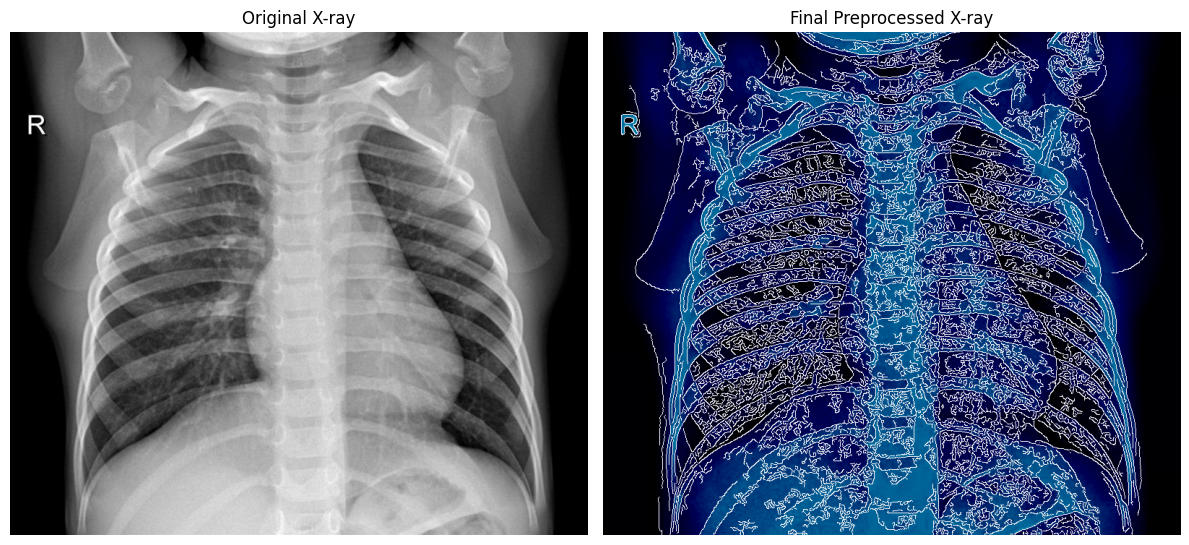

In [ ]:
import cv2
import numpy as np
import pywt
import matplotlib.pyplot as plt

def preprocess_xray(image_path):
    # Step 1: Load and convert to grayscale
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    if image is None:
        raise FileNotFoundError(f"Image not found at path: {image_path}")

    # Step 2: Denoising using Gaussian filter
    denoised = cv2.GaussianBlur(image, (5, 5), 0)

    # Step 3: Histogram Equalization
    equalized = cv2.equalizeHist(denoised)

    # Step 4: CLAHE for local contrast
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    clahe_img = clahe.apply(equalized)

    # Step 5: Unsharp Masking (Sharpening)
    blurred = cv2.GaussianBlur(clahe_img, (9, 9), 10.0)
    unsharp = cv2.addWeighted(clahe_img, 1.5, blurred, -0.5, 0)

    # Step 6: Edge Detection (Canny)
    edges = cv2.Canny(unsharp, threshold1=30, threshold2=100)

    # Step 7: Wavelet Transform
    coeffs = pywt.dwt2(unsharp, 'haar')
    cA, (cH, cV, cD) = coeffs
    wavelet_combined = cv2.normalize(np.sqrt(cH**2 + cV**2 + cD**2), None, 0, 255, cv2.NORM_MINMAX)
    wavelet_combined = wavelet_combined.astype(np.uint8)
    wavelet_resized = cv2.resize(wavelet_combined, (unsharp.shape[1], unsharp.shape[0]))

    # Step 8: Median Blurring
    median_blur = cv2.medianBlur(unsharp, 5)

    # Step 9: Sobel Operator
    sobelx = cv2.Sobel(unsharp, cv2.CV_64F, 1, 0, ksize=3)
    sobely = cv2.Sobel(unsharp, cv2.CV_64F, 0, 1, ksize=3)
    sobel_mag = cv2.magnitude(sobelx, sobely)
    sobel_mag = cv2.normalize(sobel_mag, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

    # Step 10: Morphological Closing
    kernel = np.ones((5, 5), np.uint8)
    morph_close = cv2.morphologyEx(unsharp, cv2.MORPH_CLOSE, kernel)

    # Step 11: Morphological Erosion
    morph_eroded = cv2.erode(unsharp, kernel, iterations=1)

    # Step 12: Final Fusion
    combined = cv2.addWeighted(unsharp, 0.6, wavelet_resized, 0.3, 0)
    combined[edges > 0] = 255

    # Step 13: Apply blue-based colormap
    colored = cv2.applyColorMap(combined, cv2.COLORMAP_OCEAN)

    return image, colored

# Path to your X-ray image
image_path = "normal.jpg"  # Replace with your image file

# Run preprocessing
original, final_output = preprocess_xray(image_path)

# Display results (Original and Final output side by side)
plt.figure(figsize=(12, 6))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(original, cmap='gray')
plt.title("Original X-ray")
plt.axis('off')

# Final output image
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(final_output, cv2.COLOR_BGR2RGB))
plt.title("Final Preprocessed X-ray")
plt.axis('off')

plt.tight_layout()
plt.show()